PACE stages
• [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
• [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
• [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
• [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

# Pace: Plan Stage
In this stage, consider the following questions where applicable to complete your code response: 1.
Identify any outliers:
• What methods are best for identifying outliers?
• Use numpy functions to investigate the mean() and median() of the data and understand
range of data values
• Use a boxplot to visualize the distribution of the data
• How do you make the decision to keep or exclude outliers from any future models?
• There are three main options for dealing with outliers: keeping them as they are, deleting
them, or reassining them. Whether you keep outliers as they are, delete them, or reassign
values is a decision that you make on a dataset-by-dataset basis, according to what your goals
are for the model you are planning to construct. To help you make the decision, you can start
with these general guidelines:
2
– Delete them: If you are sure the outliers are mistakes, typos, or errors and the dataset
will be used for modeling or machine learning, then you are more likely to decide to
delete outliers. Of the three choices, you’ll use this one the least.
– Reassign them: If the dataset is small and/or the data will be used for modeling or
machine learning, you are more likely to choose a path of deriving new values to replace
the outlier values.
– Leave them: For a dataset that you plan to do EDA/analysis on and nothing else, or
for a dataset you are preparing for a model that is resistant to outliers, it is most likely
that you are going to leave them in.

# Imports
Go to Tableau Public The following link will help you complete this activity. Keep Tableau Public
open as you proceed to the next steps.
Link to supporting materials: Public Tableau: https://public.tableau.com/s/
For EDA of the data, import the data and packages that would be most helpful, such as pandas,
numpy and matplotlib.
Then, import the dataset.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')


# pAce: Analyze Stage
Consider these questions in your PACE Strategy Doc to reflect on the Analyzing stage of this task.

# Task 2a. Data exploration and cleaning
Decide which columns are applicable
The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense
of the size, shape and makeup of the data set. Then answer these questions to yourself:
Given our scenario, which data columns are most applicable? Which data columns can I eliminate,
knowing they won’t solve our problem scenario?
Consider functions that help you understand and structure the data 
• head()
• describe()
• info()
• groupby()
• sortby()
Consider these questions as you work:
What do you do about missing data (if any)?
Are there data outliers?
Find these answers later in the notebook.
Start by discovering, using head and size.

In [8]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [5]:
df.shape

(22699, 18)

In [9]:
df.size

408582

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [12]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [14]:
df['tpep_pickup_datetime']= pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'] )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

There is no missing data according to understanding we gathered from the info() function.
Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember,
one of the best ways to look for outliers is a box plot visualization.
Note: Remember to convert your date columns to datetime in order to derive total trip duration.

<Axes: xlabel='trip_distance'>

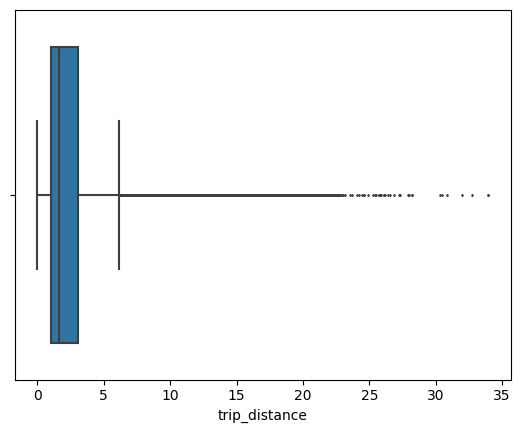

In [26]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
sns.boxplot(data = None, x=df['trip_distance'], fliersize=1)



<Axes: xlabel='total_amount'>

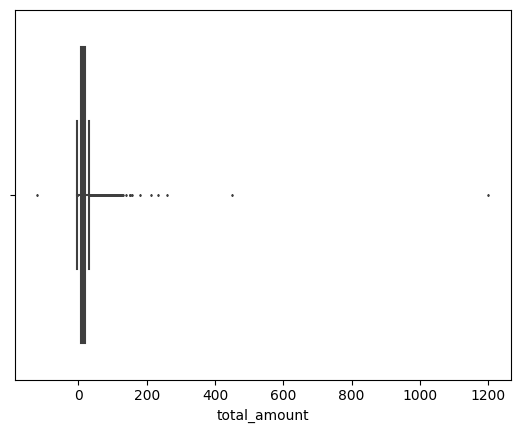

In [28]:
sns.boxplot(x=df['total_amount'], fliersize=1)

# Task 2b. Assess whether dimensions and measures are correct
In Tableau, staying on the data source page, double check the data types for the applicable columns
you selected on the previous step. Pay particular attention to the dimensions and measures to assure
they are correct.
In Python, consider the data types of the columns. Do they make sense?
Review the instructions at this link to create the required Tableau visualization.

# Task 2c. Select visualization type(s)
Select data visualization types that will help you understand and explain the data.
Now that you know which data columns you’ll use, it is time to decide which data visualization
makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be
most helpful?
• Line graph
• Bar chart
• Box plot
• Histogram
• Heat map
• Scatter plot
• A geographic map
8
As you’ll see below, bar chart, box plot and scatter plot will be most helpful in your understanding
of this data. A box plot will be helpful to determine outliers and where the bulk of the data points
reside in terms of trip_distance, duration and total_amount
A scatter plot will be helpful to visualize the trends and patters and outliers of critical variables,
such as trip_distance and total_amount
A bar chart will help determine average number of trips per month, weekday, weekend, etc

# paCe: Construct Stage
Consider these questions in your PACE Strategy Doc to reflect on the Constructing stage of this
task

# Task 3. Data visualization
You’ve assessed your data, and decided on which data variables are most applicable. It’s time to
plot your visualization(s)!

# Boxplots

<Axes: xlabel='trip_distance'>

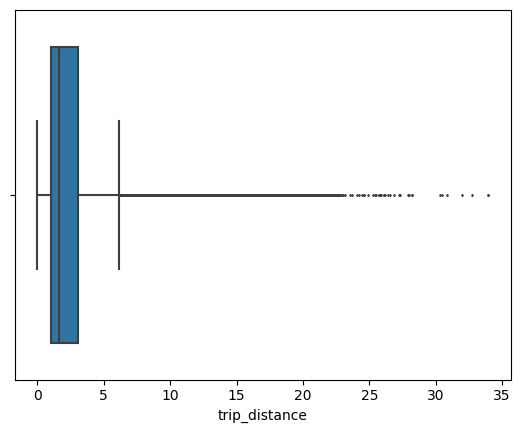

In [29]:
sns.boxplot(x=df['trip_distance'], fliersize=1)

#  Scatter plot
Remove those trips with costs associated, but with trip distance = 0.*

In [30]:
df_2 =df['trip_distance'].loc[-(df==0).all(axis=1)]

<Axes: xlabel='total_amount', ylabel='trip_distance'>

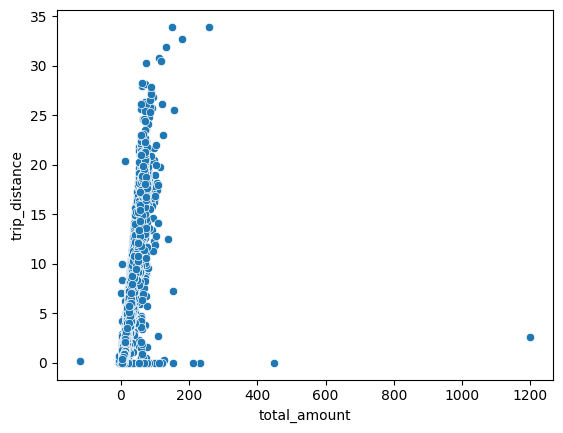

In [31]:
sns.scatterplot(x =df['total_amount'], y=df_2)

In [33]:
df.groupby('DOLocationID')['trip_distance'].mean()

DOLocationID
1      17.027353
4       2.436634
7       3.964944
9       9.305000
10      3.750000
         ...    
261     4.935897
262     2.866897
263     2.501951
264     2.928783
265    11.039000
Name: trip_distance, Length: 216, dtype: float64

<Axes: xlabel='DOLocationID', ylabel='trip_distance'>

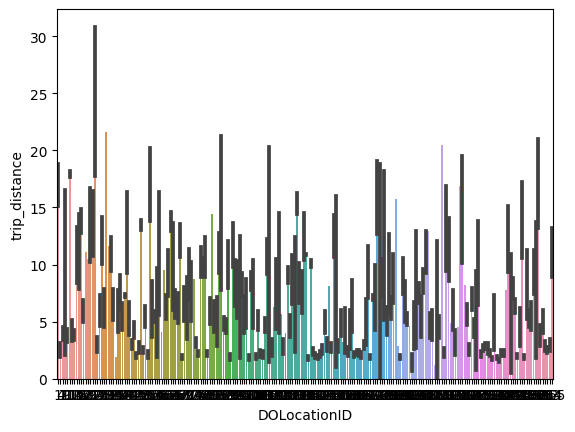

In [34]:
sns.barplot(data=df, x =df['DOLocationID'], y=df['trip_distance'])

# pacE: Execute Stage
Consider the Execute section of the PACE strategy document to reflect on the Execute stage of
this task.

# Task 4a. Results and evaluation
Having built visualizations in Tableau and in Python, what have you learned about the dataset?
What other questions have your visualizations uncovered that you should pursue?
Pro tip: Put yourself in your client’s perspective. What would they want to know?
Use the following code fields to pursue any additional EDA based on the visualizations you’ve already plotted. Also use the space to make sure your visualizations are clean, easily understandable,
and accessible.
Ask yourself: Did you consider color, contrast, emphasis, and labeling?
[Learners: insert your response here]
I have learned …. the highest distribution of trip distances are below 5 miles, but there are outliers
all the way out to 35 miles. There are no missing values.
My other questions are …. There are several trips that have a trip distance of “0.0.” What might
those trips be? Will they impact our model?
My client would likely want to know … that the data includes dropoff and pickup times. We can
use that information to derive a trip duration for each line of data. This would likely be something
that will help the client with their model.

In [36]:
df['trip_duration'] =(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [37]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,0 days 00:08:00
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,0 days 00:59:38
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,0 days 00:21:59
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,0 days 00:12:07
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,0 days 00:20:26


# Task 4b. Conclusion
Make it professional and presentable
You have visualized the data you need to share with the director now. Remember, the goal of a
data visualization is for an audience member to glean the information on the chart in mere seconds.
Questions to ask yourself for reflection: Why is it important to conduct Exploratory Data Analysis?
Why would we need to create a visual map of the NYC Taxi rides? Why would this be useful?
[Learners: insert your response here]
EDA is important because …
• EDA helps a data professional to get to know the data, understand its outliers, clean its
missing values, and prepare it for future modeling.
Visualizations helped me understand ..
• That this dataset has some outliers that we will need to make decisions on prior to designing
a model.
You’ve now completed a professional data visualization according to a business need. Well done!
Be sure to save your work as a reference for later work in Tableau.

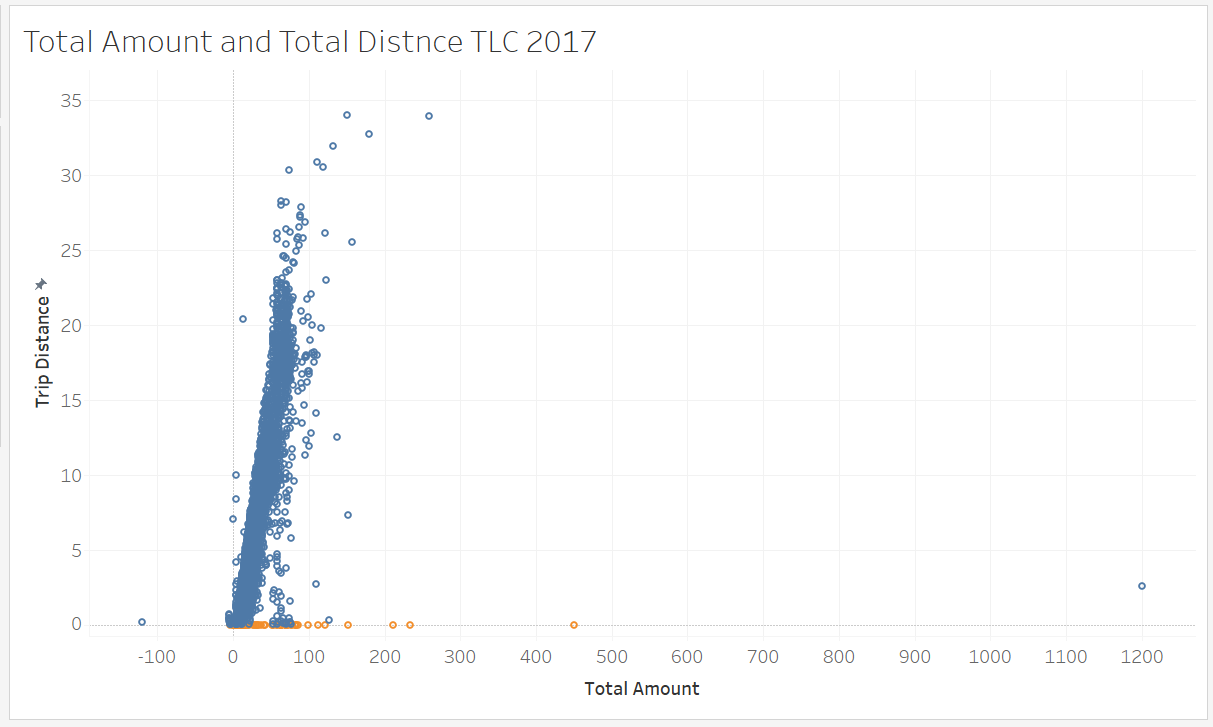